In [1]:
import numpy as np

csv_path = "data/mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In [3]:
fuji.shape

(300, 5)

# [Problem 1] Data visualization

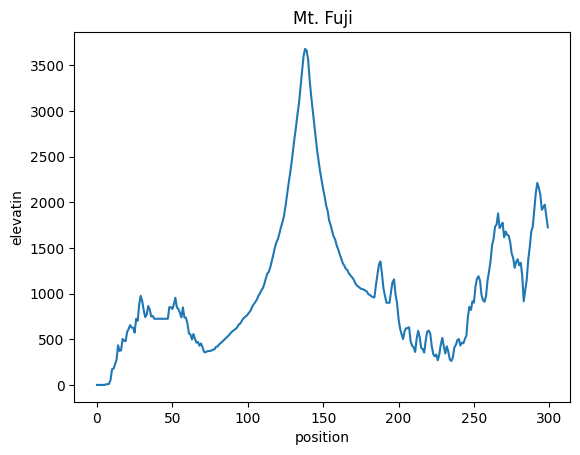

In [4]:
import matplotlib.pyplot as plt
plt.plot(fuji[:, 3])
plt.title('Mt. Fuji')
plt.xlabel("position")
plt.ylabel("elevatin")
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point

In [5]:
x = fuji[:, 0]
y = fuji[:, 3]


In [6]:
grad_fuji = np.diff(y)/np.diff(x)
grad_fuji

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,    0.59,
          4.99,   42.21,  117.15,    6.28,   50.37,   47.17,  158.38,
        -62.02,    8.32,  123.34,  -18.01,   -7.57,  102.68,   30.42,
         44.04,  -26.74,   -1.58,  -54.09,  151.4 ,  -22.01,  177.53,
         96.7 ,  -57.01, -102.16,  -73.94,   27.86,   93.14,  -37.54,
        -78.13,    7.72,  -31.61,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  127.68,   -0.82,
        -20.36,   49.44,   74.7 , -105.62,  -17.92,  -41.59,  -51.04,
        109.86, -110.53,   -1.82,  -64.24, -108.22,  -11.79,  -54.82,
         60.87,  -55.26,  -40.69,    7.33,  -40.17,   24.72,  -41.94,
        -49.98,   -6.61,   13.23,    2.13,    0.15,    6.43,    9.02,
          3.5 ,   28.27,    2.19,   22.4 ,   15.66,   13.16,   16.58,
         16.7 ,   14.44,   17.  ,   17.1 ,   21.43,   13.92,   13.37,
         10.68,   18.67,   28.72,   11.93,   27.79,   25.57,   15.45,
         12.51,   18

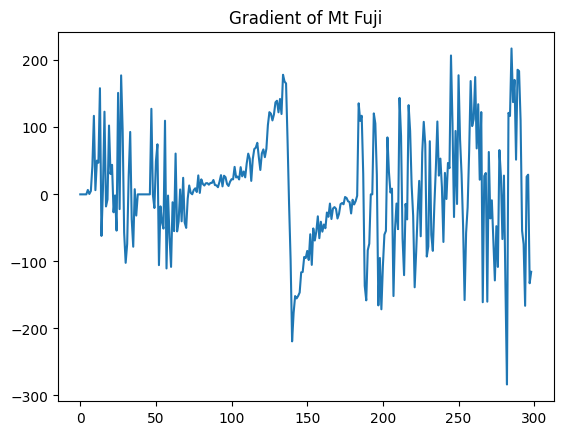

In [7]:
plt.plot(grad_fuji)
plt.title("Gradient of Mt Fuji")
plt.show()

In [8]:
x = fuji[:, 0] 
y = fuji[:, 3] 
def compute_gradient(x, y): 
    """ Calculate the gradient using the amount of change.

    Parameters
    ----------------
    x : ndarray
      x
    y : ndarray
      y
    
    Returns
    ----------------
    gradient : float
      Gradient
    """
    gradient = np.diff(y)/np.diff(x)
    return grad_fuji
res = compute_gradient(x, y) 
print(res)

[   0.      0.      0.      0.      0.      6.62    0.59    4.99   42.21
  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34  -18.01
   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4   -22.01
  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54  -78.13
    7.72  -31.61    0.      0.      0.      0.      0.      0.      0.
    0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62  -17.92
  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79  -54.82
   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98   -6.61
   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19   22.4
   15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43   13.92
   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45   12.51
   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58   26.92
   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58   69.65
   76.91   55.28   36.42   61.07   67.07   55.48   68.

# [Problem 3] Create a function to calculate the destination point

In [21]:
alpha = 0.2

def destination_point(index,
                      mt_fuji = fuji[:, 3],
                      gradient_mountain = res, 
                      alpha=0.2):

    # if gradient_mountain[index] >= 0:
    y_t = mt_fuji[index] - alpha*gradient_mountain[index]        
    # else:
        # y_t=None
    return y_t

destination_point(index=120)

1586.146

# [Problem 4] Create a function to go down the mountain

In [22]:
grad_list = []
initial_index = 136

for index in range(initial_index, int(x[-1])):
    dist = destination_point(index=index)
    grad_list.append(dist)

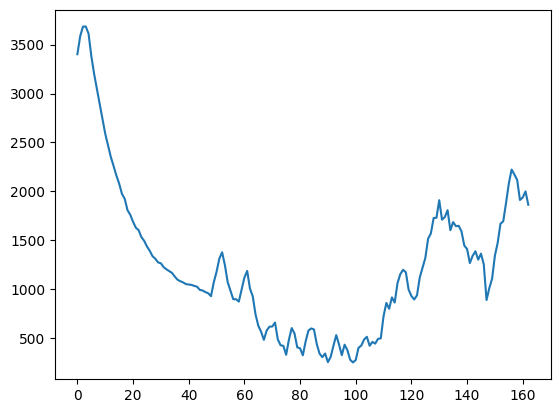

In [23]:
plt.plot(grad_list)
plt.show()

# [Problem 5] Visualization of the descent process

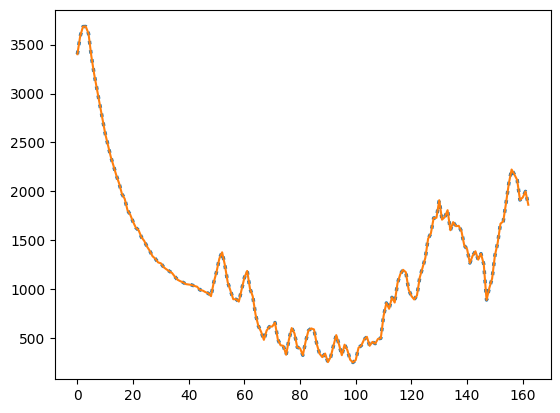

In [27]:
plt.plot(grad_list, linestyle=":", linewidth=2.5)
plt.plot(grad_list)
plt.show()

# [Problem 6] Change of initial value

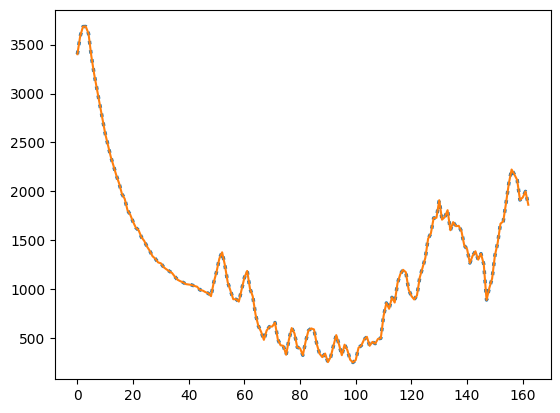

In [32]:
def get_grad_list(initial_point):
    grad_list = []
    for index in range(initial_point, int(x[-1])):
        dist = destination_point(index=index)
        grad_list.append(dist)
    return grad_list

val = get_grad_list(136)
plt.plot(val, linestyle=":", linewidth=2.5)
plt.plot(val)
plt.show()

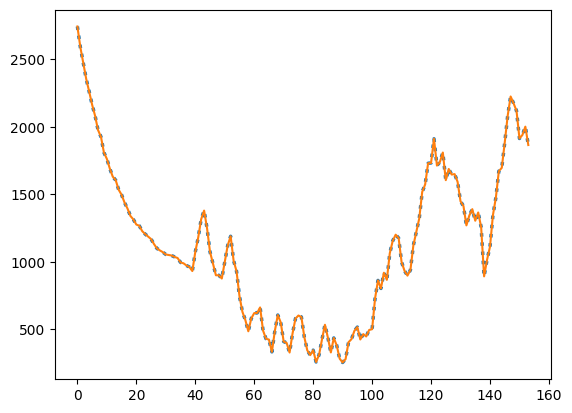

In [31]:
grad_list = []
initial_index = 145

for index in range(initial_index, int(x[-1])):
    dist = destination_point(index=index)
    grad_list.append(dist)

plt.plot(grad_list, linestyle=":", linewidth=2.5)
plt.plot(grad_list)
plt.show()

# [Problem 7] Visualization of the descent process for each initial value

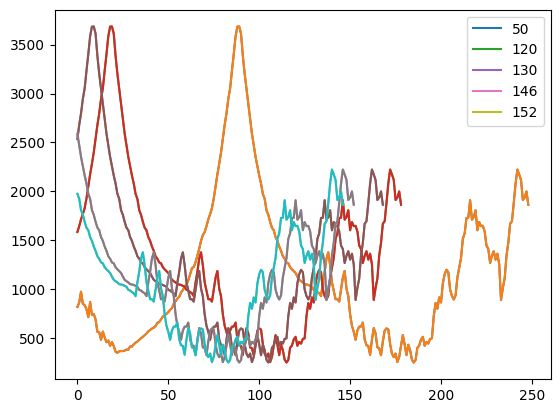

In [35]:
initial_points = [50, 120, 130, 146, 152]

for initial_point in initial_points:
    val = get_grad_list(initial_point)
    plt.plot(val, label=str(initial_point))
    plt.plot(val)
plt.legend()
plt.show()

# [Problem 8] (Advance problem) Hyperparameter changes

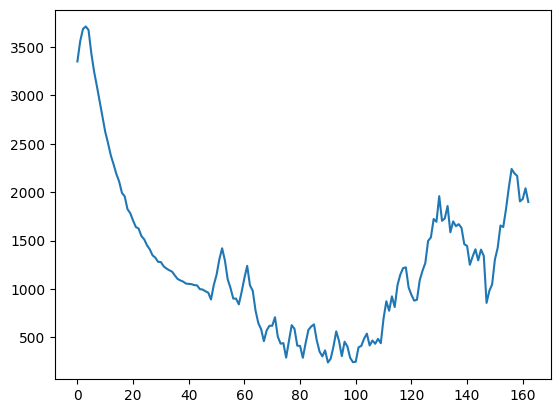

In [43]:
grad_list  = []
init=136
for i in range(init, int(x[-1])):
    grad_list.append(destination_point(i, alpha=0.5))
plt.plot(grad_list)
plt.show()